In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
files.upload()

Saving Chapter4_PE_Income_Spending_DataSet.csv to Chapter4_PE_Income_Spending_DataSet.csv


{'Chapter4_PE_Income_Spending_DataSet.csv': b'Petroleum_Engineer_Gender,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100)\r\nMale,19,34.67635403,37.05\r\nMale,21,34.67635403,76.95\r\nFemale,20,36.98811096,5.7\r\nFemale,23,36.98811096,73.15\r\nFemale,31,39.2998679,38\r\nFemale,22,39.2998679,72.2\r\nFemale,35,41.61162483,5.7\r\nFemale,23,41.61162483,89.3\r\nMale,64,43.92338177,2.85\r\nFemale,30,43.92338177,68.4\r\nMale,67,43.92338177,13.3\r\nFemale,35,43.92338177,94.05\r\nFemale,58,46.23513871,14.25\r\nFemale,24,46.23513871,73.15\r\nMale,37,46.23513871,12.35\r\nMale,22,46.23513871,75.05\r\nFemale,35,48.54689564,33.25\r\nMale,20,48.54689564,62.7\r\nMale,52,53.17040951,27.55\r\nFemale,35,53.17040951,93.1\r\nMale,35,55.48216645,33.25\r\nMale,25,55.48216645,69.35\r\nFemale,46,57.79392338,4.75\r\nMale,31,57.79392338,69.35\r\nFemale,54,64.72919419,13.3\r\nMale,29,64.72919419,77.9\r\nFemale,45,64.72919419,30.4\r\nMale,35,64.72919419,57.95\r\nFemale,40,67.0409

In [3]:
df=pd.read_csv('Chapter4_PE_Income_Spending_DataSet.csv')
df.head()

,Petroleum_Engineer_Gender,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100)
0,Male,19,34.676354,37.05
1,Male,21,34.676354,76.95
2,Female,20,36.988111,5.70
3,Female,23,36.988111,73.15
4,Female,31,39.299868,38.00


In [5]:
DF=pd.get_dummies(df,drop_first=True)
DF.head()

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male
0,19,34.676354,37.05,1
1,21,34.676354,76.95,1
2,20,36.988111,5.70,0
3,23,36.988111,73.15,0
4,31,39.299868,38.00,0


In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(DF)


In [54]:
from sklearn.neighbors import LocalOutlierFactor
clf=LocalOutlierFactor(n_neighbors=40,metric='euclidean', contamination=0.1)
clf.fit(df_scaled)

LocalOutlierFactor(contamination=0.1, metric='euclidean', n_neighbors=40)

In [55]:
df_scaled=pd.DataFrame(df_scaled, columns=DF.columns)
df_scaled.head()

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [56]:
df_scaled['scores']=clf.negative_outlier_factor_
df_scaled.head()

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male,scores
0,-1.424569,-1.738999,-0.434801,1.128152,-1.180548
1,-1.281035,-1.738999,1.195704,1.128152,-1.094004
2,-1.352802,-1.700830,-1.715913,-0.886405,-1.333629
3,-1.137502,-1.700830,1.040418,-0.886405,-1.110217
4,-0.563369,-1.662660,-0.395980,-0.886405,-1.041171


(array([ 2.,  1.,  3.,  4., 11., 12., 27., 52., 57., 31.]),
 array([-1.36461337, -1.3216208 , -1.27862823, -1.23563566, -1.19264309,
        -1.14965052, -1.10665795, -1.06366538, -1.02067281, -0.97768024,
        -0.93468766]),
 <a list of 10 Patch objects>)

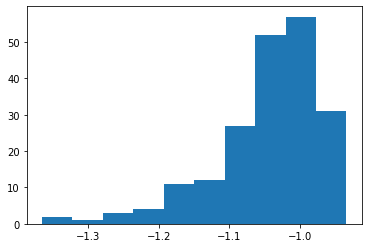

In [23]:
plt.hist(df_scaled['scores'])

In [24]:
df_scaled['Anomaly']=clf.fit_predict(df_scaled.iloc[:,:4])
df_scaled.head()

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male,scores,Anomaly
0,-1.424569,-1.738999,-0.434801,1.128152,-1.140684,1
1,-1.281035,-1.738999,1.195704,1.128152,-1.109668,1
2,-1.352802,-1.700830,-1.715913,-0.886405,-1.364613,-1
3,-1.137502,-1.700830,1.040418,-0.886405,-1.128348,1
4,-0.563369,-1.662660,-0.395980,-0.886405,-1.054131,1


In [26]:
Anomaly=df_scaled.loc[df_scaled['Anomaly']==-1]
Anomaly_index=list(Anomaly.index)
Anomaly_index

[2,
 6,
 7,
 8,
 10,
 11,
 12,
 19,
 22,
 162,
 188,
 190,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199]

In [27]:
import plotly.express as px
px.scatter(df_scaled, x=df_scaled['Petroleum_Engineer_Income (K$)'], y=df_scaled['Spending_Habits (From 1 to 100)'], color=df_scaled['Anomaly'])

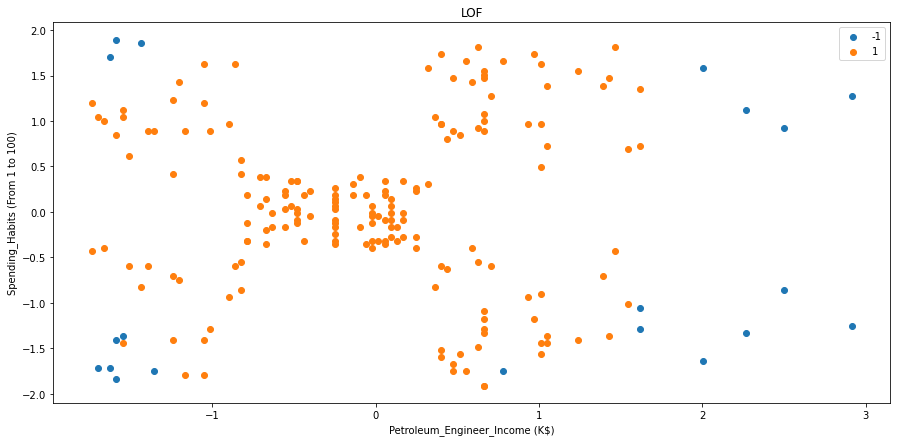

In [34]:
plt.figure(figsize=(15,7))
groups=df_scaled.groupby(by='Anomaly')
for i, j in groups:
  plt.scatter(j['Petroleum_Engineer_Income (K$)'], j['Spending_Habits (From 1 to 100)'], label=i)
  plt.legend()
  plt.xlabel('Petroleum_Engineer_Income (K$)')
  plt.ylabel('Spending_Habits (From 1 to 100)')
  plt.title('LOF')